This is a regression problem where data related to each employee represent one observation. The presumption is that the experience, education, role, and city are the independent features, while the salary depends on them.

Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.

Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, you can use it to determine if and to what extent the experience or gender impact salaries.

To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the method of ordinary least squares.

The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
The value 𝑅² = 1 corresponds to SSR = 0, that is to the perfect fit since the values of predicted and actual responses fit completely to each other.

If there are just two independent variables, the estimated regression function is 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂. It represents a regression plane in a three-dimensional space. The goal of regression is to determine the values of the weights 𝑏₀, 𝑏₁, and 𝑏₂ such that this plane is as close as possible to the actual responses and yield the minimal SSR.

Polynomial Regression:
In other words, in addition to linear terms like 𝑏₁𝑥₁, your regression function 𝑓 can include non-linear terms such as 𝑏₂𝑥₁², 𝑏₃𝑥₁³, or even 𝑏₄𝑥₁𝑥₂, 𝑏₅𝑥₁²𝑥₂, and so on.

The simplest example of polynomial regression has a single independent variable, and the estimated regression function is a polynomial of degree 2: 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥².

Now, remember that you want to calculate 𝑏₀, 𝑏₁, and 𝑏₂, which minimize SSR. These are your unknowns!

Keeping this in mind, compare the previous regression function with the function 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ used for linear regression. They look very similar and are both linear functions of the unknowns 𝑏₀, 𝑏₁, and 𝑏₂. This is why you can solve the polynomial regression problem as a linear problem with the term 𝑥² regarded as an input variable.

In the case of two variables and the polynomial of degree 2, the regression function has this form: 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂². The procedure for solving the problem is identical to the previous case. You apply linear regression for five inputs: 𝑥₁, 𝑥₂, 𝑥₁², 𝑥₁𝑥₂, and 𝑥₂². What you get as the result of regression are the values of six weights which minimize SSR: 𝑏₀, 𝑏₁, 𝑏₂, 𝑏₃, 𝑏₄, and 𝑏₅.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
x.shape

(6, 1)

In [4]:
model = LinearRegression()

In [5]:
model.fit(x, y)

LinearRegression()

In [6]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.715875613747954


In [7]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


In [10]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


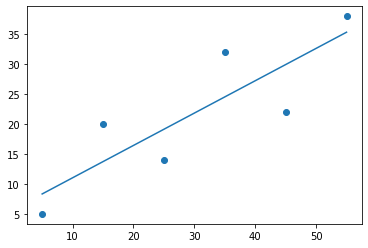

In [18]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)

model = LinearRegression().fit(x_, y)

r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

y_pred = model.predict(x_)

coefficient of determination: 0.7178963893249607
intercept: 4.438392857142851
coefficients: [ 0.65785714 -0.00196429]


In [21]:
# Step 1: Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

In [22]:
print('coefficients:', coefficients, sep='\n')

coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]


𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂².
